In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [3]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [4]:
# Print out the 'APPLICATION_TYPE' value counts
application_counts = charity_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Based on the application_counts, anything under 1,000 counts will be placed in a new "Other" application_type.
replace_applications = list(application_counts[application_counts < 1000].index)

# Replace in DataFrame
for application in replace_applications:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(application,"Other")
    
# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()


T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE              6
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [7]:
# Based on the chairty_cat we will now print out the 'CLASSIFICATION' value counts to determined how it will be binned.
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C4200        1
C1245        1
C4120        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

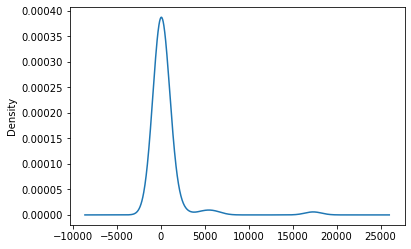

In [8]:
# Visualize the 'CLASSIFICATION' counts to help us bin the data.
classification_counts.plot.density()

In [9]:
# Based on the previous plot, the classification_counts under 5,000 will be binned in a new "Other" classification.
replace_classifications = list(classification_counts[classification_counts < 5000].index)

# Replace in DataFrame
for classification in replace_classifications:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,"Other")
    
# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
Other    10899
C2000     6074
Name: CLASSIFICATION, dtype: int64

In [10]:
# Check to see if the binning was successful and value accounts are less than 10.
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE              6
AFFILIATION                   6
CLASSIFICATION                3
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [11]:
# Based on the "NAME" count, we can determine this data is unique and will not help our analysis, therefore we will drop it.
charity_df = charity_df.drop("NAME", axis=1)

In [12]:
charity_cat2 = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat2]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat2)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat2,1)
charity_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Remove IS_SUCCESSFUL outcome target from features data
y = charity_df.IS_SUCCESSFUL
X = charity_df.drop(columns="IS_SUCCESSFUL")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 912us/step - loss: 0.5944 - accuracy: 0.7093
Epoch 2/100
804/804 [==============================] - 1s 996us/step - loss: 0.5655 - accuracy: 0.7265
Epoch 3/100
804/804 [==============================] - 1s 909us/step - loss: 0.5617 - accuracy: 0.7277
Epoch 4/100
804/804 [==============================] - 1s 990us/step - loss: 0.5599 - accuracy: 0.7283
Epoch 5/100
804/804 [==============================] - 1s 881us/step - loss: 0.5584 - accuracy: 0.7295
Epoch 6/100
804/804 [==============================] - 1s 811us/step - loss: 0.5573 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 837us/step - loss: 0.5566 - accuracy: 0.7302
Epoch 8/100
804/804 [==============================] - 1s 817us/step - loss: 0.5554 - accuracy: 0.7307
Epoch 9/100
804/804 [==============================] - 1s 843us/step - loss: 0.5548 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 1s 889us/step - l

804/804 [==============================] - 1s 867us/step - loss: 0.5392 - accuracy: 0.7398
Epoch 80/100
804/804 [==============================] - 1s 878us/step - loss: 0.5397 - accuracy: 0.7383
Epoch 81/100
804/804 [==============================] - 1s 881us/step - loss: 0.5391 - accuracy: 0.7379
Epoch 82/100
804/804 [==============================] - 1s 873us/step - loss: 0.5389 - accuracy: 0.7387
Epoch 83/100
804/804 [==============================] - 1s 831us/step - loss: 0.5392 - accuracy: 0.7398
Epoch 84/100
804/804 [==============================] - 1s 810us/step - loss: 0.5389 - accuracy: 0.7376
Epoch 85/100
804/804 [==============================] - 1s 865us/step - loss: 0.5385 - accuracy: 0.7395
Epoch 86/100
804/804 [==============================] - 1s 877us/step - loss: 0.5385 - accuracy: 0.7383
Epoch 87/100
804/804 [==============================] - 1s 835us/step - loss: 0.5387 - accuracy: 0.7378
Epoch 88/100
804/804 [==============================] - 1s 856us/step - loss:

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 853us/step - loss: 0.6027 - accuracy: 0.7087
Epoch 2/50
804/804 [==============================] - 1s 834us/step - loss: 0.5710 - accuracy: 0.7234
Epoch 3/50
804/804 [==============================] - 1s 842us/step - loss: 0.5667 - accuracy: 0.7250
Epoch 4/50
804/804 [==============================] - 1s 805us/step - loss: 0.5648 - accuracy: 0.7261
Epoch 5/50
804/804 [==============================] - 1s 830us/step - loss: 0.5636 - accuracy: 0.7268
Epoch 6/50
804/804 [==============================] - 1s 816us/step - loss: 0.5623 - accuracy: 0.7268
Epoch 7/50
804/804 [==============================] - 1s 852us/step - loss: 0.5617 - accuracy: 0.7272
Epoch 8/50
804/804 [==============================] - 1s 804us/step - loss: 0.5609 - accuracy: 0.7274
Epoch 9/50
804/804 [==============================] - 1s 866us/step - loss: 0.5609 - accuracy: 0.7269
Epoch 10/50
804/804 [==============================] - 1s 836us/step - loss: 0.560

In [19]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 866us/step - loss: 0.5856 - accuracy: 0.7111
Epoch 2/50
804/804 [==============================] - 1s 780us/step - loss: 0.5629 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 1s 813us/step - loss: 0.5600 - accuracy: 0.7289
Epoch 4/50
804/804 [==============================] - 1s 774us/step - loss: 0.5591 - accuracy: 0.7306
Epoch 5/50
804/804 [==============================] - 1s 844us/step - loss: 0.5576 - accuracy: 0.7304
Epoch 6/50
804/804 [==============================] - 1s 842us/step - loss: 0.5570 - accuracy: 0.7314
Epoch 7/50
804/804 [==============================] - 1s 850us/step - loss: 0.5556 - accuracy: 0.7315
Epoch 8/50
804/804 [==============================] - 1s 825us/step - loss: 0.5550 - accuracy: 0.7320
Epoch 9/50
804/804 [==============================] - 1s 800us/step - loss: 0.5544 - accuracy: 0.7334
Epoch 10/50
804/804 [==============================] - 1s 835us/step - loss: 0.553

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 841us/step - loss: 0.6154 - accuracy: 0.6876
Epoch 2/100
804/804 [==============================] - 1s 841us/step - loss: 0.5740 - accuracy: 0.7184
Epoch 3/100
804/804 [==============================] - 1s 884us/step - loss: 0.5682 - accuracy: 0.7225
Epoch 4/100
804/804 [==============================] - 1s 858us/step - loss: 0.5654 - accuracy: 0.7250
Epoch 5/100
804/804 [==============================] - 1s 937us/step - loss: 0.5635 - accuracy: 0.7265
Epoch 6/100
804/804 [==============================] - 1s 969us/step - loss: 0.5620 - accuracy: 0.7263
Epoch 7/100
804/804 [==============================] - 1s 948us/step - loss: 0.5608 - accuracy: 0.7278
Epoch 8/100
804/804 [==============================] - 1s 965us/step - loss: 0.5601 - accuracy: 0.7280
Epoch 9/100
804/804 [==============================] - 1s 963us/step - loss: 0.5594 - accuracy: 0.7276
Epoch 10/100
804/804 [==============================] - 1s 954us/step - l

804/804 [==============================] - 1s 839us/step - loss: 0.5522 - accuracy: 0.7318
Epoch 80/100
804/804 [==============================] - 1s 820us/step - loss: 0.5519 - accuracy: 0.7329
Epoch 81/100
804/804 [==============================] - 1s 788us/step - loss: 0.5520 - accuracy: 0.7336
Epoch 82/100
804/804 [==============================] - 1s 746us/step - loss: 0.5520 - accuracy: 0.7324
Epoch 83/100
804/804 [==============================] - 1s 805us/step - loss: 0.5519 - accuracy: 0.7329
Epoch 84/100
804/804 [==============================] - 1s 850us/step - loss: 0.5516 - accuracy: 0.7328
Epoch 85/100
804/804 [==============================] - 1s 999us/step - loss: 0.5522 - accuracy: 0.7325
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7336
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7335
Epoch 88/100
804/804 [==============================] - 1s 938us/step - loss: 0.5

In [21]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 918us/step - loss: 0.6506 - accuracy: 0.6410
Epoch 2/50
804/804 [==============================] - 1s 966us/step - loss: 0.5872 - accuracy: 0.7191
Epoch 3/50
804/804 [==============================] - 1s 811us/step - loss: 0.5800 - accuracy: 0.7257
Epoch 4/50
804/804 [==============================] - 1s 710us/step - loss: 0.5781 - accuracy: 0.7290
Epoch 5/50
804/804 [==============================] - 1s 783us/step - loss: 0.5765 - accuracy: 0.7297
Epoch 6/50
804/804 [==============================] - 1s 744us/step - loss: 0.5746 - accuracy: 0.7305
Epoch 7/50
804/804 [==============================] - 1s 855us/step - loss: 0.5726 - accuracy: 0.7300
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5710 - accuracy: 0.7298
Epoch 9/50
804/804 [==============================] - ETA: 0s - loss: 0.5697 - accuracy: 0.73 - 1s 2ms/step - loss: 0.5698 - accuracy: 0.7306
Epoch 10/50
804/804 [=======================

In [22]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 918us/step - loss: 0.5841 - accuracy: 0.7158
Epoch 2/100
804/804 [==============================] - 1s 938us/step - loss: 0.5660 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.73 - 1s 1ms/step - loss: 0.5619 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5603 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 1s 997us/step - loss: 0.5588 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 840us/step - loss: 0.5574 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 900us/step - loss: 0.5560 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.73 - 1s 909us/step - loss: 0.5555 - accuracy: 0.7310
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.

804/804 [==============================] - 1s 891us/step - loss: 0.5362 - accuracy: 0.7413
Epoch 80/100
804/804 [==============================] - 1s 881us/step - loss: 0.5362 - accuracy: 0.7422
Epoch 81/100
804/804 [==============================] - 1s 853us/step - loss: 0.5358 - accuracy: 0.7399
Epoch 82/100
804/804 [==============================] - 1s 844us/step - loss: 0.5357 - accuracy: 0.7426
Epoch 83/100
804/804 [==============================] - 1s 884us/step - loss: 0.5359 - accuracy: 0.7410
Epoch 84/100
804/804 [==============================] - 1s 891us/step - loss: 0.5359 - accuracy: 0.7410
Epoch 85/100
804/804 [==============================] - 1s 883us/step - loss: 0.5353 - accuracy: 0.7425
Epoch 86/100
804/804 [==============================] - 1s 879us/step - loss: 0.5355 - accuracy: 0.7399
Epoch 87/100
804/804 [==============================] - 1s 881us/step - loss: 0.5354 - accuracy: 0.7414
Epoch 88/100
804/804 [==============================] - 1s 821us/step - loss:

In [23]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 879us/step - loss: 1.9051 - accuracy: 0.5595
Epoch 2/100
804/804 [==============================] - 1s 913us/step - loss: 0.9543 - accuracy: 0.7026
Epoch 3/100
804/804 [==============================] - 1s 873us/step - loss: 0.6680 - accuracy: 0.7180
Epoch 4/100
804/804 [==============================] - 1s 867us/step - loss: 0.6146 - accuracy: 0.7212
Epoch 5/100
804/804 [==============================] - 1s 830us/step - loss: 0.6025 - accuracy: 0.7222
Epoch 6/100
804/804 [==============================] - 1s 844us/step - loss: 0.5884 - accuracy: 0.7202
Epoch 7/100
804/804 [==============================] - 1s 848us/step - loss: 0.5898 - accuracy: 0.7260
Epoch 8/100
804/804 [==============================] - 1s 866us/step - loss: 0.5844 - accuracy: 0.7256
Epoch 9/100
804/804 [==============================] - 1s 910us/step - loss: 0.5838 - accuracy: 0.7251
Epoch 10/100
804/804 [==============================] - 1s 860us/step - l

804/804 [==============================] - 1s 755us/step - loss: 0.5582 - accuracy: 0.7297
Epoch 80/100
804/804 [==============================] - 1s 811us/step - loss: 0.5577 - accuracy: 0.7306
Epoch 81/100
804/804 [==============================] - 1s 863us/step - loss: 0.5566 - accuracy: 0.7310
Epoch 82/100
804/804 [==============================] - 1s 917us/step - loss: 0.5575 - accuracy: 0.7314
Epoch 83/100
804/804 [==============================] - 1s 795us/step - loss: 0.5585 - accuracy: 0.7306
Epoch 84/100
804/804 [==============================] - 1s 810us/step - loss: 0.5694 - accuracy: 0.7303
Epoch 85/100
804/804 [==============================] - 1s 817us/step - loss: 0.5697 - accuracy: 0.7299
Epoch 86/100
804/804 [==============================] - 1s 909us/step - loss: 0.5680 - accuracy: 0.7306
Epoch 87/100
804/804 [==============================] - 1s 985us/step - loss: 0.5684 - accuracy: 0.7294
Epoch 88/100
804/804 [==============================] - 1s 995us/step - loss:

In [25]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3= 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 911us/step - loss: 0.6259 - accuracy: 0.6894
Epoch 2/100
804/804 [==============================] - 1s 974us/step - loss: 0.5673 - accuracy: 0.7290
Epoch 3/100
804/804 [==============================] - 1s 973us/step - loss: 0.5621 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 1s 925us/step - loss: 0.5600 - accuracy: 0.7305
Epoch 5/100
804/804 [==============================] - 1s 927us/step - loss: 0.5585 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 1s 873us/step - loss: 0.5576 - accuracy: 0.7303
Epoch 7/100
804/804 [==============================] - 1s 889us/step - loss: 0.5562 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 879us/step - loss: 0.5558 - accuracy: 0.7310
Epoch 9/100
804/804 [==============================] - 1s 930us/step - loss: 0.5553 - accuracy: 0.7314
Epoch 10/100
804/804 [==============================] - 1s 903us/step - l

Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7399
Epoch 81/100
804/804 [==============================] - 1s 954us/step - loss: 0.5393 - accuracy: 0.7393
Epoch 82/100
804/804 [==============================] - 1s 934us/step - loss: 0.5389 - accuracy: 0.7399
Epoch 83/100
804/804 [==============================] - 1s 917us/step - loss: 0.5392 - accuracy: 0.7390
Epoch 84/100
804/804 [==============================] - 1s 946us/step - loss: 0.5393 - accuracy: 0.7395
Epoch 85/100
804/804 [==============================] - 1s 922us/step - loss: 0.5391 - accuracy: 0.7393
Epoch 86/100
804/804 [==============================] - 1s 942us/step - loss: 0.5395 - accuracy: 0.7399
Epoch 87/100
804/804 [==============================] - 1s 976us/step - loss: 0.5391 - accuracy: 0.7407
Epoch 88/100
804/804 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.73 - 1s 974us/step - loss: 0.5389 - accuracy: 0.7403
Epoch 89/100
804/804 [==